<a href="https://colab.research.google.com/github/JImaruf/DMML_Project_Student_Pass_Fail_Predict/blob/main/DMML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,f1_score

In [2]:
data1 = pd.read_csv('student-mat-pass-or-fail_n.csv')
data1

,school,sex,age,address,Pstatus,traveltime,studytime,failures,schoolsup,famsup,...,activities,nursery,higher,internet,romantic,freetime,goout,health,absences,passed
0,1,1,18,1,0,2,2,0,1,0,...,0,1,1,0,0,3,4,3,6,0
1,1,1,17,1,1,1,2,0,0,1,...,0,0,1,1,0,3,3,3,4,0
2,1,1,15,1,1,1,2,3,1,0,...,0,1,1,1,0,3,2,3,10,1
3,1,1,15,1,1,1,3,0,0,1,...,1,1,1,1,1,2,2,5,2,1
4,1,1,16,1,1,1,2,0,0,1,...,0,1,1,0,0,3,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,1,2,2,0,1,...,0,1,1,0,0,5,4,4,11,0
391,0,0,17,1,1,2,1,0,0,0,...,0,0,1,1,0,4,5,2,3,1
392,0,0,21,0,1,1,1,3,0,0,...,0,0,1,0,0,5,3,3,3,0
393,0,0,18,0,1,3,1,0,0,0,...,0,0,1,1,0,4,1,5,0,1


In [3]:
data1.head(10)

,school,sex,age,address,Pstatus,traveltime,studytime,failures,schoolsup,famsup,...,activities,nursery,higher,internet,romantic,freetime,goout,health,absences,passed
0,1,1,18,1,0,2,2,0,1,0,...,0,1,1,0,0,3,4,3,6,0
1,1,1,17,1,1,1,2,0,0,1,...,0,0,1,1,0,3,3,3,4,0
2,1,1,15,1,1,1,2,3,1,0,...,0,1,1,1,0,3,2,3,10,1
3,1,1,15,1,1,1,3,0,0,1,...,1,1,1,1,1,2,2,5,2,1
4,1,1,16,1,1,1,2,0,0,1,...,0,1,1,0,0,3,2,5,4,1
5,1,0,16,1,1,1,2,0,0,1,...,1,1,1,1,0,4,2,5,10,1
6,1,0,16,1,1,1,2,0,0,0,...,0,1,1,1,0,4,4,3,0,1
7,1,1,17,1,0,2,2,0,1,1,...,0,1,1,0,0,1,4,1,6,0
8,1,0,15,1,0,1,2,0,0,1,...,0,1,1,1,0,2,2,1,0,1
9,1,0,15,1,1,1,2,0,0,1,...,1,1,1,1,0,5,1,5,0,1


In [4]:
data1.shape

(395, 21)

In [5]:
data1.columns

Index(['school', 'sex', 'age', 'address', 'Pstatus', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'freetime', 'goout', 'health',
       'absences', 'passed'],
      dtype='object')

In [6]:
data1.isnull().sum()

school        0
sex           0
age           0
address       0
Pstatus       0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
freetime      0
goout         0
health        0
absences      0
passed        0
dtype: int64

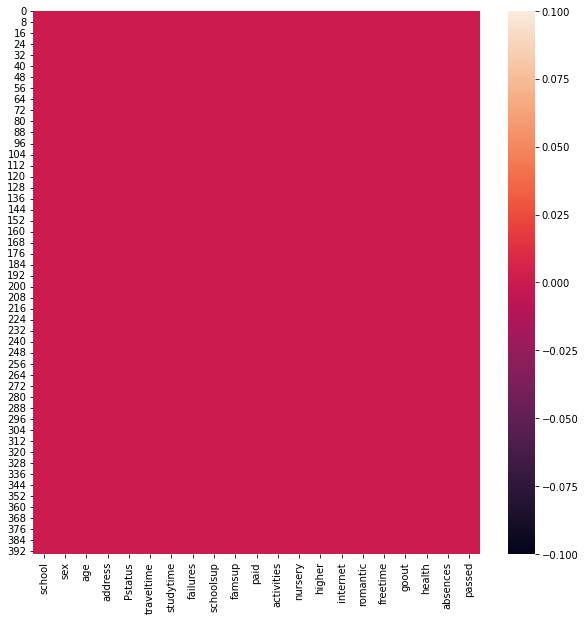

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.isnull())

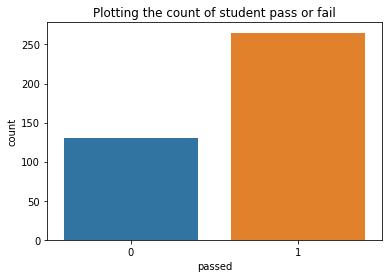

In [8]:
sns.countplot(x=data1.passed)
plt.title("Plotting the count of student pass or fail")
plt.show()

In [9]:
data1.passed.value_counts()

1    265
0    130
Name: passed, dtype: int64

In [10]:
X = data1.drop('passed', axis=1)
y = data1['passed']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
kfold = model_selection.KFold(n_splits = 3)

In [26]:
#Using Bagging Classifier
base_cls = DecisionTreeClassifier()

In [27]:
num_trees = 200

model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees)

In [28]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [29]:
acc = model_selection.cross_val_score(model, X_train, y_train, cv = kfold)
print("accuracy :",acc.mean())

accuracy : 0.7125528177372643


In [30]:
confusion_matrix(y_test, y_pred)

array([[ 5, 10],
       [ 1, 24]])

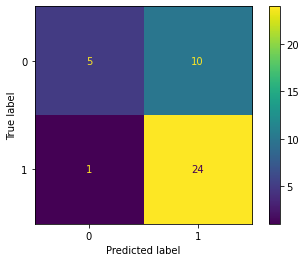

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.33      0.48        15
           1       0.71      0.96      0.81        25

    accuracy                           0.73        40
   macro avg       0.77      0.65      0.64        40
weighted avg       0.75      0.72      0.69        40



In [33]:
X2 = data1.iloc[:,0:-1]
Y2 = data1.iloc[:, -1]

In [34]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, random_state =200)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
classifier = RandomForestClassifier(n_estimators =100, criterion ='gini')
classifier.fit(X2_train, y2_train)

RandomForestClassifier()

In [37]:
classifier.score(X2_test, y2_test)

0.7142857142857143

In [39]:
y2_pred = classifier.predict(X2_test)
y2_pred



array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1])

In [40]:
confusion_matrix(y2_test, y2_pred)

array([[13, 21],
       [13, 72]])

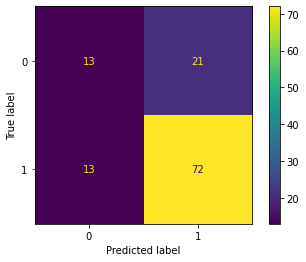

In [41]:
cm = confusion_matrix(y2_test, y2_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()